# Linear Regression: Health Insurance Cost 

## 1. Import Required Modules 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2. Data Preparation 

### 2.1 Data download 

In [2]:
url='https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
data_df=pd.read_csv(url, sep=',')

### 2.2 Data frame inspection

In [3]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The data set contains 3 Categorical features and 4 numerical features! 
- No missing values   

#### 2.2.1. Summary statistics of Numerical and Categorical features 

##### 2.2.1.1 Numerical Features 

In [10]:
num_features=['age','bmi','children','charges']
data_df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### 2.2.1.2. Nominal(categorical) features 

In [11]:
cat_features=['sex','smoker','region']

def get_level_counts(data_df: pd.DataFrame, features: list) -> pd.DataFrame:
    '''Takes a dataframe and feature list. Gets level counts for each feature.
    Returns a dataframe with counts indexed by feature and level.'''
    dfs=[]

    for feature in features:
        level_counts=data_df[feature].value_counts()
        tuples=list(zip([feature]*len(level_counts), level_counts.index))
        index=pd.MultiIndex.from_tuples(tuples, names=['feature', 'level'])
        df=pd.DataFrame.from_dict({'Count':level_counts.values})
        df.index=index
        dfs.append(df)

    return pd.concat(dfs, axis=0)

level_counts=get_level_counts(data_df, cat_features)
level_counts.head(len(level_counts))
print(level_counts)

                   Count
feature level           
sex     male         676
        female       662
smoker  no          1064
        yes          274
region  southeast    364
        southwest    325
        northwest    325
        northeast    324


The data set has 
- More or less equal number of male & female sex 
- More non-smoking individuals 
- More or less uniform distribution of individuals across regions! 

### 2.3 Test-train split 

In [12]:
training_df, testing_df=train_test_split(data_df,test_size=0.25,random_state=315)

## 3. EDA 
### 3.1 Baseline model performance

In [15]:
average_insurance_cost=training_df['charges'].mean()
print(f'Average insurance cost: ${average_insurance_cost:.2f}')

rmse=root_mean_squared_error(training_df['charges'], [average_insurance_cost]*len(training_df))
print(f'Average insurance cost using RMSE model: ${rmse:.2f}')



Average insurance cost: $13182.42
Average insurance cost using RMSE model: $12141.50


### 3.2 Data cleaning 
#### 3.2.1 Numerical features  

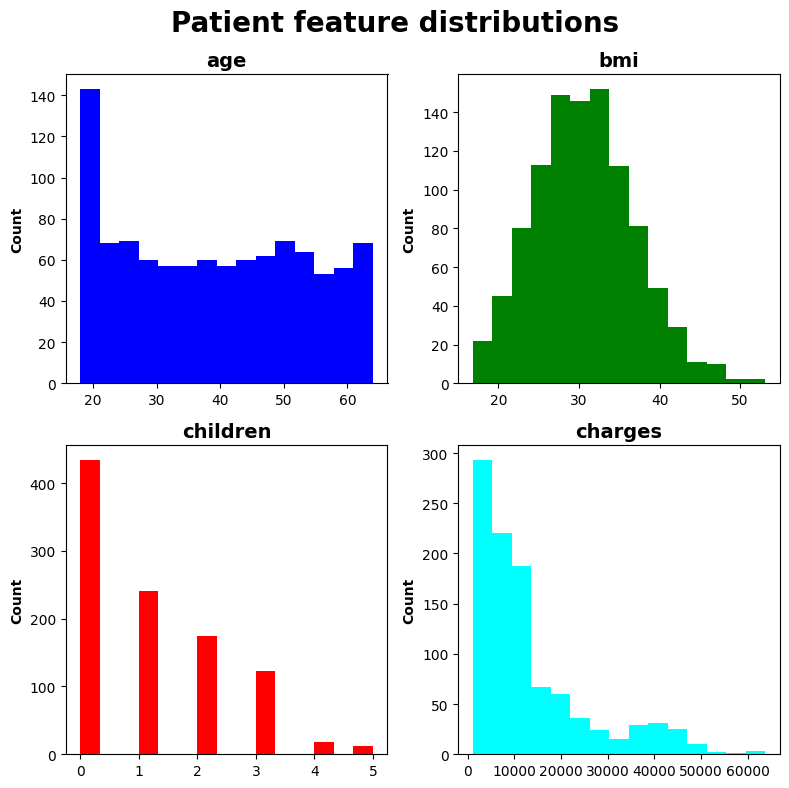

In [24]:
fig, axs=plt.subplots(2,2, figsize=(8,8))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan']
fig.suptitle('Patient feature distributions', fontsize=20, fontweight='bold')

for i, feature in enumerate(num_features):
    axs[i].set_title(feature, fontsize=14, fontweight='bold')
    axs[i].hist(training_df[feature], color=colors[i % len(colors)], bins=15)
    axs[i].set_ylabel('Count',  fontweight='bold')

fig.tight_layout()
fig.show()

#### 3.2.2 Categorical features 

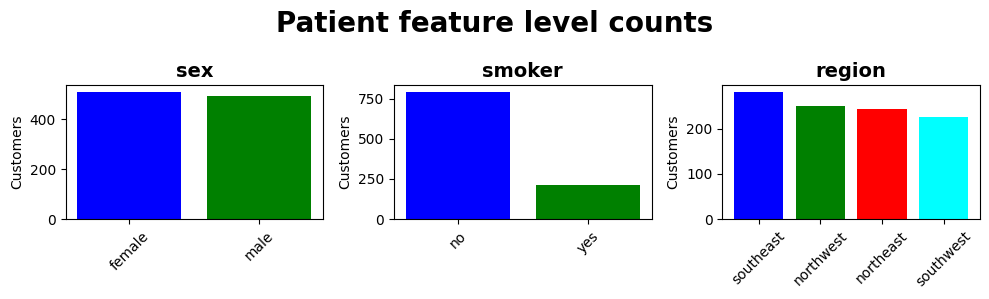

In [27]:
fig, axs=plt.subplots(1,3, figsize=(10,3))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
fig.suptitle('Patient feature level counts',fontsize=20, fontweight='bold')

for i, feature in enumerate(cat_features):

    level_counts=training_df[feature].value_counts()

    axs[i].set_title(feature,fontsize=14, fontweight='bold')
    axs[i].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color=colors)
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_ylabel('Customers')

fig.tight_layout()
fig.show()